# Linear Regression Single Variable  
  
or  
  
# Simple Linear Regression

We are going to predict house prices based on the available data:

The available data:  
  
| area | price |
|:----------:|:----------:|
| 2600 | 550000 |
| 3000 | 565000 |
| 3200 | 610000 |
| 3600 | 680000 |
| 4000 | 725000 |

We can plot the data using scatter plot where the actual data is marked and we can draw a line which predicts the data.  
The line should be closest to all data points.  
To make that possible, we use a cost function that tells the difference between predicted data by the line and the actual data.  
> cost function = $\sum_{i=1}^n (\Delta i)^2$  
Where:  
> n : Total number of data points  
> $\Delta$ : Difference between predicted and actual data points  

The Function we are using to predict the price:  
> y = mx + b  
  
in oure case, it'll be:
  
> price = m * area + b  
  
Where:  
  
> area : independant variable  
> price : dependant variable  
> m : slope / coefficient  
> b : intercept  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
# load the dataset

df = pd.read_excel("houseprices.xlsx")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


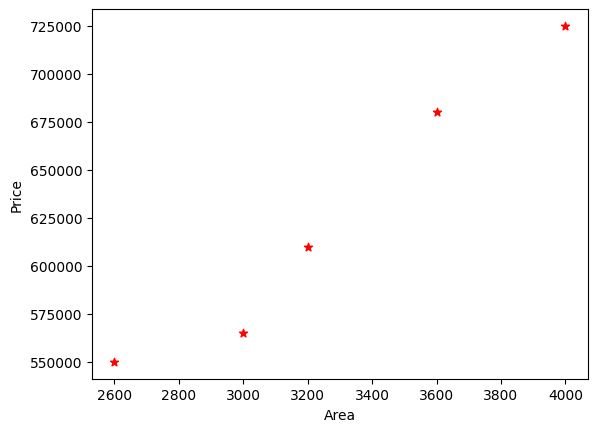

In [26]:
# Plotting the data points

%matplotlib inline 
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.area, df.price, c='red', marker='*');

In [11]:
# creating regression object

reg = linear_model.LinearRegression()

# Fitting the model

reg.fit(df[['area']], df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# making a prediction

reg.predict([[3400]])

g:\My Drive\AI Engineering\aienv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([642294.52054795])

when we fit the model, it actually calculates the coeffecient (m / slope) and intercept (b) of the data.  
Based on these coeffecient and intercept, it predicts the new data.  

let's see what are the values of coeffecient and intercept this model is taking

In [16]:
# value of coeffiecient (m / slope)
reg.coef_

array([135.78767123])

In [17]:
# value of intercept (b)
reg.intercept_

np.float64(180616.43835616432)

Now we know the value, let's try to predict the value manually and check if the prediction was correct.

In [18]:
# Formula: price = m * area + b

price = 135.78767123 * 3400 + 180616.43835616432
price

642294.5205381643

### Visualizing the line on the chart

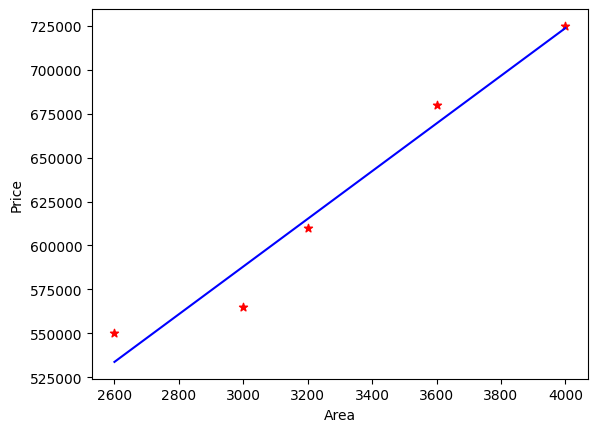

In [29]:
%matplotlib inline 
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.area, df.price, c='red', marker='*')
plt.plot(df.area, reg.predict(df[['area']]), color='blue');

Getting input from a file instead of manual input and saving the predicted output directly to a new file

In [21]:
areas = pd.read_excel("areas.xlsx")
areas

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3480
8,4750
9,2310


In [22]:
# predicting

prices = reg.predict(areas)
prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  653157.53424658,  825607.87671233,
        494285.95890411, 1402705.47945205, 1266917.80821918,
       1144708.90410959])

In [23]:
# adding new column in dataframe

areas['price'] = prices
areas

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3480,6.531575e+05
8,4750,8.256079e+05
9,2310,4.942860e+05


In [25]:
# saving into a new file

areas.to_excel("predicted_prices.xlsx", index=False)